<a href="https://colab.research.google.com/github/sebacea/AnEco2/blob/master/EjercicioISLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo ISLM

Fuente: http://www.ncachanosky.com/macroeconomics-with-python.html

## IS

La curva IS se deriva de las siguiente ecuación

\begin{equation}
Y(C,I,G,XN) = C + I + G + XN
\end{equation}

Si asumimos que algunas de las variables $(C,I,G,XN)$ dependen de la tasa de interés, como usualmente es el caso con la variable inversión. Entonces, tenemos $I(i)$ y dejamos las demás variables constantes en un valor fijo $(C,G,XN)=(\bar{C},\bar{G},\bar{XN})$. De esa forma, el producto queda solo en función de la tasa de interés:

\begin{equation}
Y(i)=Y\left(I(i),\bar{C},\bar{G},\bar{XN}\right) = \bar{C}+ I(i) +\bar{G}+\bar{XN}
\end{equation}

La IS como relación entre producto y tasa de interés de equilibrio está representada en la ecuación anterior pero usualmente es expresada como la función inversa de esta. Es decir, dejando la tasa de interés en función del producto, $i(Y)$, que no es más que invertir la función anterior.

En lo que sigue daremos más estructura a las diferentes variables $(C,I,G,XN)$ y haremos el cálculo de la curva.

### IS: Importaciones como función del producto

En este caso fijaremos el valor de la variable $G=\bar{G}$. Adicionalmente diremos que $XN(X,Z)=X-Z(\alpha,\beta,Y,T)$ donde Las ecuaciones de la IS son:

\begin{equation}
Y(C,I,G,XN) = C + I + \bar{G} + \underbrace{(\bar{X} - Z)}_{XN}
\end{equation}

\begin{equation}
 C = a + b\cdot(Y -t\cdot Y - T+TR)
\end{equation}

\begin{equation}
    I = \bar{I} - d \cdot i
\end{equation}


\begin{equation}
    Z = \alpha + \beta \cdot(Y - T)
\end{equation}

Reemplazando todo en la primera ecuación obtenemos:

\begin{equation}
    Y = \underbrace{\left[a + b\cdot(Y -t\cdot Y-T+TR) \right]}_{C} + \underbrace{\left[\bar{I} - d \cdot i \right]}_{I} + \bar{G} + \left[\bar{X} - \underbrace{\left(\alpha + \beta\cdot (Y-T) \right)}_{Z} \right]  
 \end{equation}

Despejamos el producto y obtenemos

\begin{eqnarray}
Y\cdot(1-b+b\cdot t+\beta)&=\left[a - b\cdot T +b\cdot TR\right] + \left[\bar{I} - d \cdot i \right] + \bar{G} + \left[\bar{X} - \left(\alpha - \beta\cdot T \right) \right] \\
\Rightarrow Y&=\frac{(a - \alpha) -(b-\beta)T+b\cdot TR +\bar{I} + \bar{G} + \bar{X} - d \cdot i }{(1-b+b\cdot t+\beta)}
\end{eqnarray}

In [0]:
# Definimos el PRODUCTO en función de la tasa de interés y demás parámetros

def Y_IS(a, alpha, b, beta, t, T, TR, I_bar, G_bar, X_bar, d, i):
    Y_IS = ((a-alpha)-(b-beta)*T+b*TR + I_bar + G_bar + X_bar - d*i)/(1-b+b*t+beta)
    return Y_IS

Despejando la variable interés, $i$, obtenemos:
 
 \begin{equation}
    i_{IS}\left(a,b,t,T,\bar{I},d,\bar{G},\bar{X},\alpha,\beta\right) = \underbrace{\frac{(a-\alpha)-(b-\beta)\cdot T +b\cdot TR+ \bar{I} + \bar{G} + \bar{X}}{d}}_\text{intercept} - \underbrace{\frac{1-b+b\cdot t+\beta}{d} }_\text{slope} \cdot Y
 \end{equation}

In [0]:
# Definimos la TASA DE INTERÉS en función del producto y demás parámetros

def i_IS(a, alpha, b, beta, t, T, TR, I_bar, G_bar, X_bar, d, Y):
    i_IS = ((a-alpha)-(b-beta)*T +b*TR + I_bar + G_bar + X_bar - (1-b+b*t+beta)*Y)/d
    return i_IS

En lo que sigue asumimos la siguiente parametrización $(a,b,t,T,\bar{I},d,\bar{G},\bar{X},\alpha,\beta)=(20,0.2,0,1,10,5,8,2,5,0.2)$

In [0]:
import numpy as np               # Incluímos paquete con funciones de cálculo científico mínimas
import matplotlib.pyplot as plt  # Incluímos paquete para gráficos

# Definimos parámetros de acuerdo a los números dados

a = 100                 # Consumo autónomo
b = 0.2                # Propensión marginal a consumir
t = 0                  # Impuesto proporcional al ingreso
T = 1                  # Impuesto de suma fija
TR = 0                 # Transferencias estatales
I_bar = 10             # Inversión autónoma
d = 2                  # Impacto marginal de i en la inversión
G_bar = 20              # Gasto de gobierno
X_bar = 5              # Exportaciónes exógenas
alpha = 5              # Importaciones autónomas
beta  = 0.15            # Marginal propensity to import

# Arrays
Y_size = 150           # Cantidad de puntos a evaluar
Y = np.arange(Y_size)  # Valores a evaluar de Y de 1 a Y_size=100

Ahora calculamos los valores de equilibrio de $i$ para valores de $Y$ entre $1$ y $100$ dados los parámetros.

In [4]:
iIS = i_IS(a, alpha, b, beta, t, T, TR, I_bar, G_bar, X_bar, d, Y) # Calculamos Y_size valores de i
import pandas as pd                                       # Usamos librería pandas para ver datos
data= pd.DataFrame({'Interés': iIS,
                    'Producto':Y})                        # Ponemos los valores de (i,Y) en una tabla                      
data.head()                                               # Vemos los primeros 5 valores de la tabla

,Interés,Producto
0,64.975,0
1,64.500,1
2,64.025,2
3,63.550,3
4,63.075,4


Ahora graficamos los valores de la tabla precedente

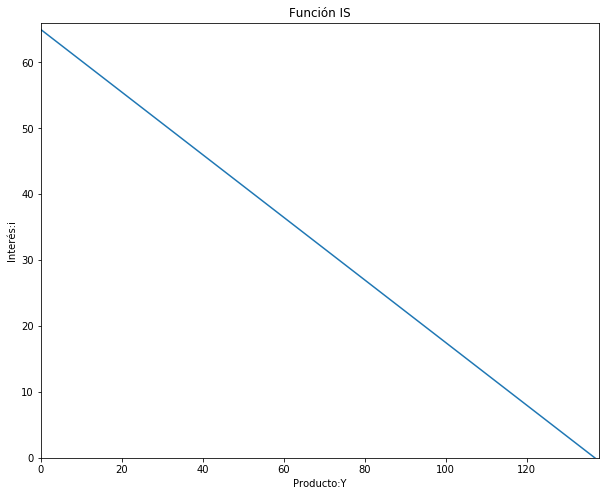

In [5]:
y_max = np.max(iIS)                                                        # Definimos el i máximo para eje ordenadas
x_max = Y_IS(a, alpha, b, beta, t, T, TR, I_bar, G_bar, X_bar, d, i=0)          # Valor de Producto para i=0

v = [0, x_max+1, 0, y_max+1]                                                 # Fijamos rango del gráfico
fig, ax = plt.subplots(figsize=(10, 8))                                  # Definimos el gráfico
ax.set(title="Función IS", xlabel=r'Producto:Y', ylabel=r'Interés:i')    # Definimos etiquetas
ax.plot(Y, iIS)
plt.axis(v)                                                              # Usamos el rango 'v' 
plt.show()

### IS: Ejemplo de Economía cerrada

Si no tenemos sector externo, entonces podemos trabajar un modelo donde $XN=0$ por lo que tenemos

\begin{equation}
Y(C,I,G) = C + I + \bar{G}
\end{equation}

Sabemos sabe que de manera agregada las familias tienen un consumo de $100$ es decir $(a=100)$. Mientras que el gobierno desembolsó un gasto total de 150 u.m. $(\bar{G}=150)$ más transferencias a las personas por un tercio del gasto público $\left(TR=\frac{\bar{G}}{3}=50\right)$, donde lo anterior fue cubierto a través de un sistema de impuestos que consistía en una componente fijo que llegaba a las 35 u.m. $(T=35)$, más un porcentaje de los ingresos de un 15% $(t=0.15)$. Se conoce adicionalmente que las familias de cada 100 u.m. que tienen, destinan 40 u.m. a sus ahorros $(b=1-0.4=0.6)$. Además, se sabe que las empresas invierten de acuerdo a la siguiente función: $I(i) = 250 - 700\cdot i$ (donde $i$ esta expresada en tanto por uno, es decir 100% se expresa como 1). Es decir, $\bar{I}=250$ y $d=700$. 

En conclusión tenemos 

\begin{eqnarray}
Y&=&100+0.6*(Y-0.15\cdot Y-35+50)+250 - 700\cdot i+150
\end{eqnarray}

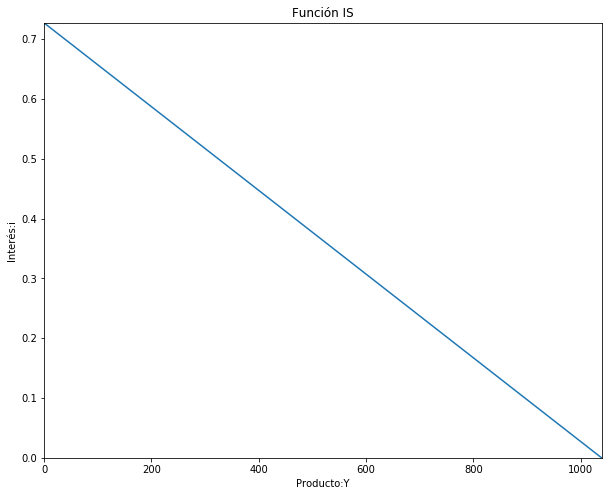

In [6]:
(a1,b1,t1,T1,TR1,I_bar1,d1,G_bar1,X_bar1,alpha1,beta1)=(100,0.6,0.15,35,50,250,700,150,0,0,0)
Y_size1 = 1050           
Y1 = np.arange(Y_size1) 

iIScerrada = i_IS(a1, alpha1, b1, beta1, t1, T1, TR1, I_bar1, G_bar1, X_bar1, d1, Y1)
y_max = np.max(iIScerrada)                                                        # Definimos el i máximo para eje ordenadas
x_max = Y_IS(a1, alpha1, b1, beta1, t1, T1, TR1, I_bar1, G_bar1, X_bar1, d1, i=0)          # Valor de Producto para i=0

v = [0, x_max+1, 0, y_max]                                                 # Fijamos rango del gráfico
fig, ax = plt.subplots(figsize=(10, 8))                                  # Definimos el gráfico
ax.set(title="Función IS", xlabel=r'Producto:Y', ylabel=r'Interés:i')    # Definimos etiquetas
ax.plot(Y1, iIScerrada)
plt.axis(v)                                                              # Usamos el rango 'v' 
plt.show()

## LM 

Para construir la $LM$ primero necesitamos dar una forma a la demanda de dinero que denotaremos $L_D$ y que será función de $(c_1,c_2,Y,c_3,i)$:
$$L_D(c_1,c_2,Y,c_3,i)= c_1 + c_2 Y - c_3 i$$

De la misma forma, la oferta de dinero la denotamos $L_O$ y será función de la masa monetaria $M$ y el nivel de precios $P$:
$$L_O(M,P)=\frac{M}{P}$$

En equilibrio requerimos que la oferta y demanda sean iguales por lo que necesitamos imponer $L_O(M,P)=L_D(c_1,c_2,Y,c_3,i)$ que implica
\begin{align}
    L_O(M,P)&=L_D(c_1,c_2,Y,c_3,i)                                                              \\
    \frac{M}{P} &= c_1 + c_2 Y - c_3 i                                               \\
    i_{LM}(c_1,c_2,Y,c_3,i,M,P) &= \underbrace{\frac{1}{c_3} \cdot \left(c_1 - \frac{M}{P} \right)}_\text{intercepto} - \underbrace{\frac{c_2}{c_3}}_\text{pendiente} \cdot Y
\end{align}

In [0]:
def i_LM(c1, c2, c3, Ms, P, Y):
    i_LM = (c1 - Ms/P)/c3 + c2/c3*Y
    return i_LM

En lo que sigue asumiremos los siguientes parámetros $(c_1,c_2,c_3,M,P)=(1000,10,10,20000,20)$

In [0]:
c1 = 2500              # Demanda de dinero autónoma
c2 = 0.75                # Impacto marginal del producto en la demanda por dinero
c3 = 5                # Impacto marginal de la tasa de interés en la demanda por dinero
Ms = 23500             # Oferta nominal de dinero
P  = 10                # Nivel de precios

#c1 = 1000              # Demanda de dinero autónoma
#c2 = 10                # Impacto marginal del producto en la demanda por dinero
#c3 = 10                # Impacto marginal de la tasa de interés en la demanda por dinero
#Ms = 20000             # Oferta nominal de dinero
#P  = 20                # Nivel de precios

Calculamos los valores de equilibrio de $i$ para valores de $Y$ entre 1 y 100

In [0]:
iLM = i_LM(c1, c2, c3, Ms, P, Y)

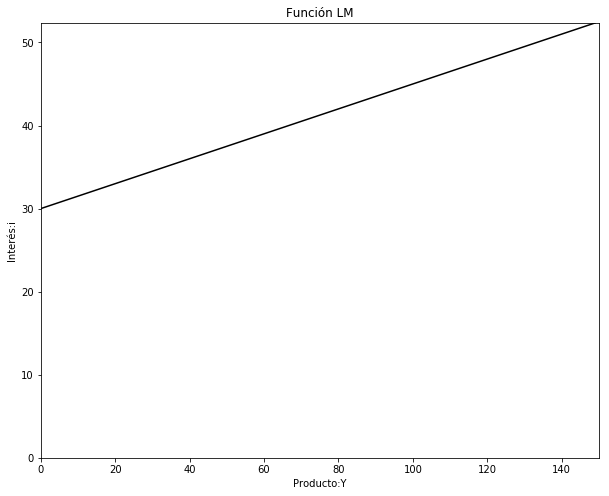

In [12]:
y_max = np.max(iLM)

v = [0, Y_size, 0, y_max]                       
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Función LM", xlabel=r'Producto:Y', ylabel=r'Interés:i')
ax.plot(Y, iLM, "k-")
plt.axis(v)                                     
plt.show()

Introducimos dos perturbaciones diferentes en la LM, primero duplicando la demanda autónoma por dinero (azul) y luego duplicando la masa monetaria (verde)

In [0]:
# Perturbamos la LM
c1p= c1*1.1
iLMp= i_LM(c1p, c2, c3, Ms, P, Y)
Msp= Ms*1.05
iLMp2= i_LM(c1, c2, c3, Msp, P, Y)

Luego graficamos las perturbaciones

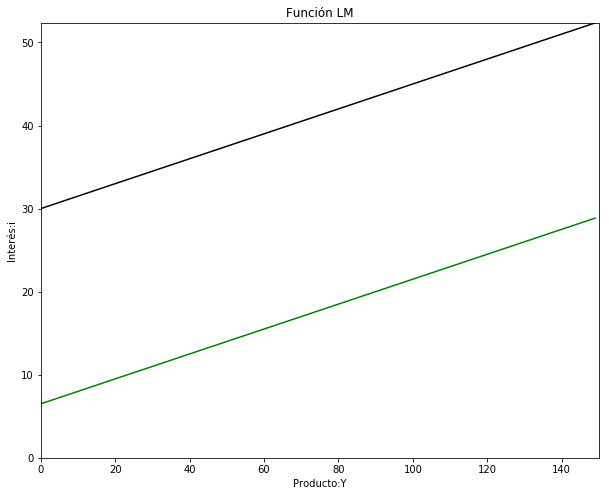

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Función LM", xlabel=r'Producto:Y', ylabel=r'Interés:i')
ax.plot(Y, iLM, "k-")
ax.plot(Y, iLMp2, "g-")
ax.plot(Y, iLMp, "b-")
plt.axis(v)                                     # Use 'v' as the axes range
plt.show()

## EQUILIBRIO ISLM

Para encontrar el equilibrio imponemos la igualación entre la tasa de interés de la IS y de la LM:

\begin{align}
    i_{LM}(c_1,c_2,Y,c_3,i,M,P) &= i_{IS} \left(a,b,t,T,\bar{I},d,\bar{G},\bar{X},\alpha,\beta\right)\\
    \frac{1}{c_3} \left(c_1 - \frac{M}{P} \right) - \frac{c_2}{c_3} \cdot Y &= \frac{(a-\alpha)-(b-\beta)T + b\cdot TR+ \bar{I} + \bar{G} + X}{d} - \frac{1-b+b\cdot t+\beta}{d} \cdot Y \\
    Y^* &= \frac{\left[(a-\alpha)-(b-\beta)T+b\cdot TR+\bar{I}+\bar{G}+X\right]/d + (1/c_3) \left(M/P -c_1 \right)}{(1-b+b\cdot t+\beta)/d - (c_2/c_3)}
\end{align}

Despejamos la tasa de interés

\begin{align}
    i^* &= \frac{1}{c_3} \left(c_1 - \frac{M}{P} \right) + \frac{c_2}{c_3} \cdot Y^*  \\
    i^* &= \frac{1}{c_3} \left(c_1 - \frac{M}{P} \right) + \frac{c_2}{c_3} \cdot \left(\frac{1-b+b\cdot t+\beta}{d} - \frac{c_2}{c_3} \right)^{-1} \cdot \left[\frac{(a-\alpha)-(b-\beta)T+b\cdot TR + \bar{I} + \bar{G} + X}{d} + \frac{1}{c_3} \left(c_1-\frac{M}{P} \right) \right]
\end{align}

Graficamos

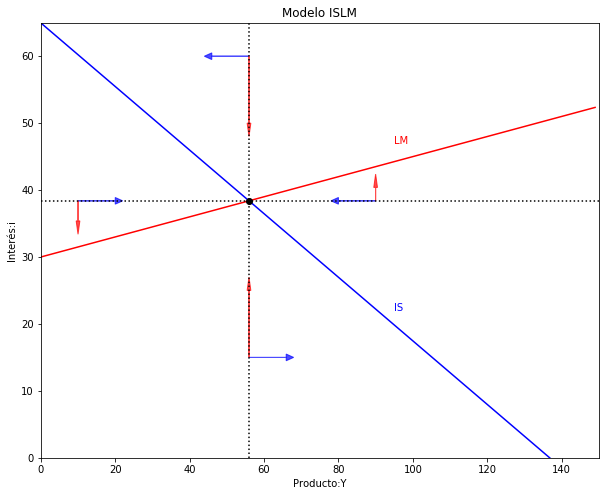

In [15]:
Y_star1 = ((a-alpha) - (b-beta)*T+b*TR + I_bar + G_bar + X_bar)/d
Y_star2 = (1/c3) * (c1 - Ms/P)
Y_star3 = (1 - b + (b*t) + beta)/d + (c2/c3)
Y_star  = (Y_star1 - Y_star2)/Y_star3

i_star1 = (1/c3)*(c1 - Ms/P)
i_star2 = (c2/c3)*Y_star
i_star  = i_star1 + i_star2

y_max = np.max(iIS)
v = [0, Y_size, 0, y_max]                      
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Modelo ISLM", xlabel=r'Producto:Y', ylabel=r'Interés:i')
ax.plot(Y, iIS, "b-")
ax.plot(Y, iLM, "r-")
ax.arrow(10, i_star, 10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(10, i_star,  0, -3, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(Y_star, 15, 10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(Y_star, 15,  0, 10, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(90, i_star,-10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(90, i_star,  0,  2, head_length=2, head_width=1, color='r', alpha=0.7)
ax.arrow(Y_star, 60,-10,  0, head_length=2, head_width=1, color='b', alpha=0.7)
ax.arrow(Y_star, 60,  0,-10, head_length=2, head_width=1, color='r', alpha=0.7)
plt.plot(Y_star, i_star, 'ko')                # Equilibrium point
plt.axvline(x=Y_star, ls=':', color='k')
plt.axhline(y=i_star, ls=':', color='k')
plt.text(95, 22, "IS", color='b')
plt.text(95, 47, "LM", color='r')
plt.axis(v)                                   # Use 'v' as the axes range
plt.show()

### Ejemplo Equilibrio ISLM de Economía cerrada

Al ejemplo de economía cerrada lo complementamos con una demanda monetaria que viene dada por $L_D(c_1,c_2,Y,c_3,i)=0.8\cdot Y-200\cdot i$, es decir $(c_1,c_2,c_3)=(0,0.8,200)$. Adicionalmente, imponemos que la oferta moentaria es $L_O(M,P)=\frac{M}{P}=750$, es decir $(Ms,P)=(750,1)$ o cualquier combinación de que el cociente sea $750$.

In [0]:
(c11,c21,c31,Ms1,P1)=(0,0.8,200,750,1)
iLMcerrada = i_LM(c11, c21, c31, Ms1, P1, Y1)

In [0]:
Y_star11 = ((a1-alpha1) - (b1-beta1)*T1+b1*TR1 + I_bar1 + G_bar1 + X_bar1)/d1
Y_star21 = (1/c31) * (c11 - Ms1/P1)
Y_star31 = (1 - b1 + (b1*t1) + beta1)/d1 + (c21/c31)
Y_star1  = (Y_star11 - Y_star21)/Y_star31

In [0]:
i_star11 = (1/c31)*(c11 - Ms1/P1)
i_star21 = (c21/c31)*Y_star1
i_star1  = i_star11 + i_star21

In [0]:
y_max = np.max(iIScerrada)
v = [0, Y_size1, 0, y_max]                      

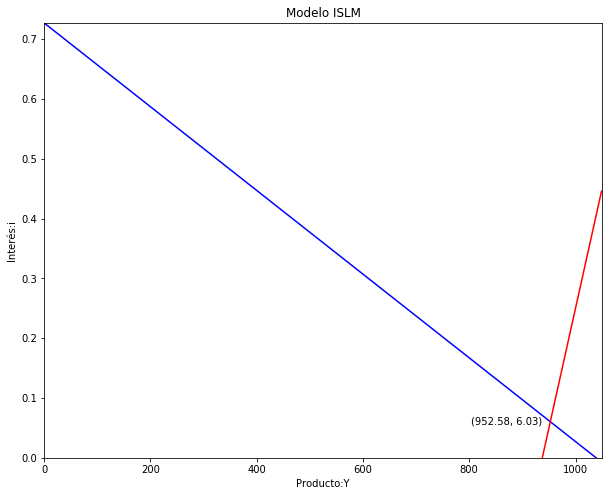

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Modelo ISLM", xlabel=r'Producto:Y', ylabel=r'Interés:i')
ax.plot(Y1, iIScerrada, "b-")
ax.plot(Y1, iLMcerrada, "r-")

plt.text(Y_star1-150, i_star1-0.005, (round(Y_star1,2),round(i_star1*100,2)), color='k')

plt.axis(v)                                   # Use 'v' as the axes range
plt.show()

Preguntas de análisis

- ¿Cuál es la pendiente de la IS? 
- ¿Cuál es la pendiente de la LM?
- ¿Qué sucede con la pendiente al si se altera una variable particular del modelo?
- ¿Qué factores pueden provocar un desplazamiento de la IS? 